In [46]:
import math as m
from pathlib import Path
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.python.summary.summary_iterator import summary_iterator

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
plt.rcParams['figure.figsize'] = 11.7,8.27

In [64]:
def get_scalar_run_tensorboard(tag, filepath):
    values, steps = [], []
    for e in tf.compat.v1.train.summary_iterator(str(filepath)):
        if len(e.summary.value)>0: #Skip first empty element
            if e.summary.value[0].tag==tag:
                value = float(e.summary.value[0].simple_value)
                step = e.step
                values.append(value)
                steps.append(step)
    return steps, values

def get_hparams(label: str) -> str:
    label = label.strip().split('/')[-2]
    hparams = label.split('_')
    # print(hparams)
    hparams = [y.split('=') for y in hparams]
    return { k: v for k, v in hparams }

def get_df(runs, tag):
    df = pd.DataFrame()

    for r in runs:
        label = r.as_posix()
        x, y = get_scalar_run_tensorboard(tag, r)
        df1 = pd.DataFrame(dict(label=label, x=x, y=y))
        df = pd.concat([df, df1])

    df.reset_index(drop=True, inplace=True)

    df['dreg'] = df['label'].map(lambda x: get_hparams(x)['dreg'])
    df['dmax'] = df['label'].map(lambda x: get_hparams(x)['dmax'])
    df['dmaxep'] = df['label'].map(lambda x: get_hparams(x)['dmaxep'])
    df['dmaxep'] = df['dmaxep'].map(lambda x: max(int(x), 100))

    df = df[df['dmax'].astype(float) < 0.6]
    return df

True


In [83]:
log_folder = Path("./padova/src/logs2")
print("Folder OK:", log_folder.is_dir())

runs = list(log_folder.rglob('ternary/*/*/events.out*'))
print("\n".join([r.as_posix() for r in runs]))

Folder OK: True
padova/src/logs2/ternary/2024-05-29-16-15-00/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.3_dmax=0.3_dmaxep=0/events.out.tfevents.1716992100.pc-jack.9196.0
padova/src/logs2/ternary/2024-05-29-16-48-16/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.3_dmaxep=100/events.out.tfevents.1716994096.pc-jack.2128.0
padova/src/logs2/ternary/2024-05-29-17-21-26/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=square_dmin=0_dmax=0.3_dmaxep=100/events.out.tfevents.1716996086.pc-jack.2752.0
padova/src/logs2/ternary/2024-05-29-17-54-36/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=sqrt_dmin=0_dmax=0.3_dmaxep=100/events.out.tfevents.1716998076.pc-jack.3544.0
padova/src/logs2/ternary/2024-05-29-18-29-24/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=const_dmin=0.5_dmax=0.5_dmaxep=0/events.out.tfevents.1717000164.pc-jack.12348.0
padova/src/logs2/ternary/2024-05-29-19-02-41/bs=200_lr=0.01_m=0.9_wd=0.0001_dreg=linear_dmin=0_dmax=0.5_dmaxep=100/events.out.tfevents.1717002161.pc-jack.19692.0
padova/src/logs2/ter

<AxesSubplot: xlabel='epoch', ylabel='zero weights [%]'>

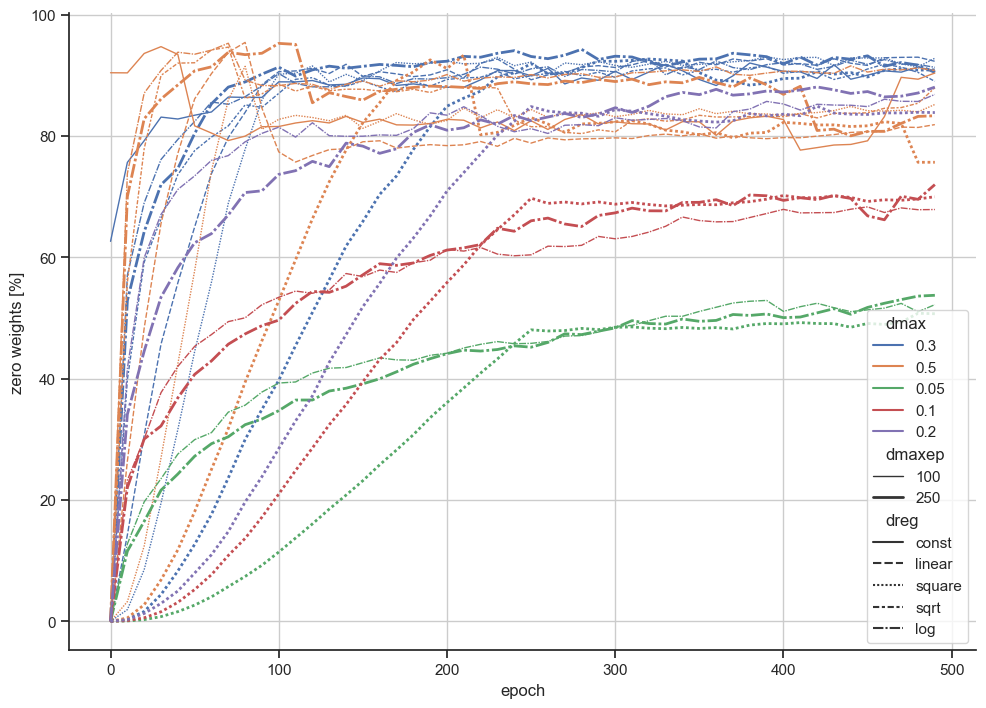

In [85]:
df1 = get_df(runs, 'weights/zeros')

plt.grid()
plt.ylabel("zero weights [%]")
plt.xlabel("epoch")
sns.lineplot(data=df1, x="x", y="y", hue="dmax", style="dreg", estimator=None, size="dmaxep", sizes=(1, 2))

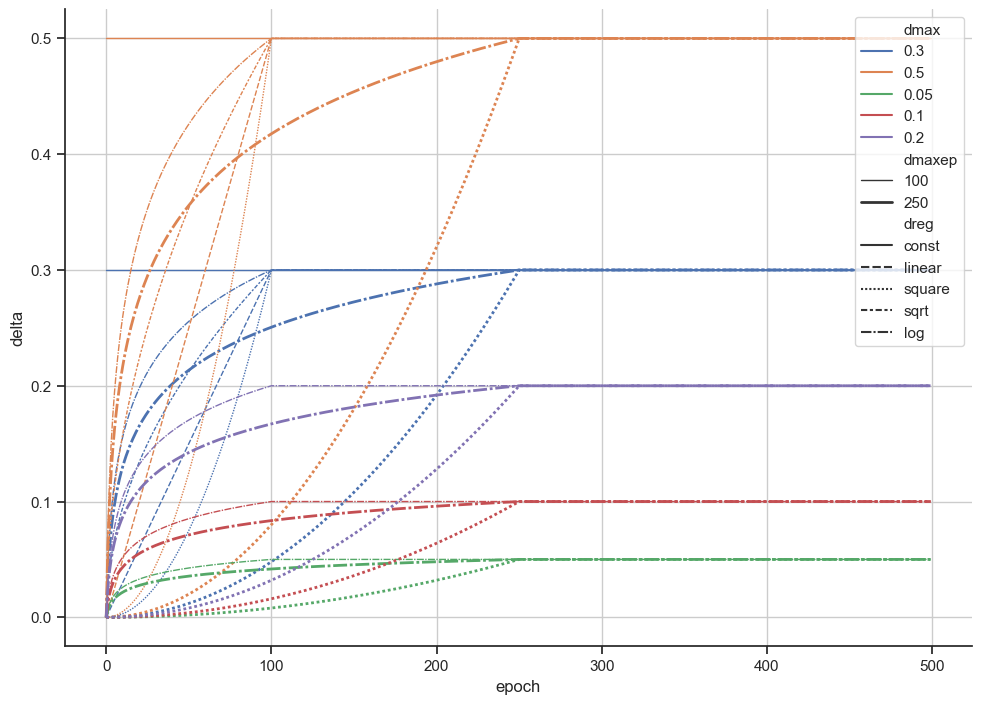

In [88]:
df2 = get_df(runs, 'DELTA')

plt.grid()
plt.ylabel("delta")
plt.xlabel("epoch")
sns.lineplot(data=df2, x="x", y="y", hue="dmax", style="dreg", estimator=None, size="dmaxep", sizes=(1, 2))
plt.legend(loc='upper right')